# Chapter 4: Percentages and Proportions

*Mathematics for Psychologists and Computation*

Welcome to Chapter 4! In this chapter, we'll explore percentages and proportions - fundamental concepts that are used extensively in psychological research for describing data, analyzing results, and communicating findings.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## What Are Percentages?

A percentage is a way of expressing a number as a fraction of 100. The word "percent" comes from the Latin "per centum," meaning "by the hundred." We use the symbol % to denote percentages.

For example:
- 25% means 25 out of 100, or $\frac{25}{100}$, which simplifies to $\frac{1}{4}$
- 50% means 50 out of 100, or $\frac{50}{100}$, which simplifies to $\frac{1}{2}$
- 75% means 75 out of 100, or $\frac{75}{100}$, which simplifies to $\frac{3}{4}$

Percentages are particularly useful in psychology because they provide a standardized way to express proportions, making it easier to compare different groups or conditions.

### Converting Between Fractions, Decimals, and Percentages

We can easily convert between fractions, decimals, and percentages:

1. **Fraction to Percentage**: Divide the numerator by the denominator and multiply by 100
2. **Decimal to Percentage**: Multiply the decimal by 100
3. **Percentage to Decimal**: Divide the percentage by 100
4. **Percentage to Fraction**: Divide the percentage by 100 and simplify

Let's see some examples:

In [2]:
# Let's create a table of common conversions
conversions = {
    'Fraction': ['1/4', '1/2', '3/4', '1/3', '2/3', '1/5', '4/5'],
    'Decimal': [0.25, 0.5, 0.75, 0.333, 0.667, 0.2, 0.8],
    'Percentage': ['25%', '50%', '75%', '33.3%', '66.7%', '20%', '80%']
}

# Create a DataFrame for better visualization
df = pd.DataFrame(conversions)
df

Fraction  Decimal Percentage
0      1/4    0.250        25%
1      1/2    0.500        50%
2      3/4    0.750        75%
3      1/3    0.333      33.3%
4      2/3    0.667      66.7%
5      1/5    0.200        20%
6      4/5    0.800        80%

Let's write some functions to convert between these different representations:

In [3]:
def fraction_to_percentage(numerator, denominator):
    """Convert a fraction to a percentage"""
    return (numerator / denominator) * 100

def decimal_to_percentage(decimal):
    """Convert a decimal to a percentage"""
    return decimal * 100

def percentage_to_decimal(percentage):
    """Convert a percentage to a decimal"""
    return percentage / 100

def percentage_to_fraction(percentage):
    """Convert a percentage to a fraction"""
    from fractions import Fraction
    return Fraction(percentage, 100).limit_denominator()

# Let's test these functions
print(f"1/4 as a percentage: {fraction_to_percentage(1, 4)}%")
print(f"0.75 as a percentage: {decimal_to_percentage(0.75)}%")
print(f"30% as a decimal: {percentage_to_decimal(30)}")
print(f"75% as a fraction: {percentage_to_fraction(75)}")

1/4 as a percentage: 25.0%
0.75 as a percentage: 75.0%
30% as a decimal: 0.3
75% as a fraction: 3/4


## Percentages in Psychology

Percentages are used extensively in psychology for various purposes:

1. **Describing sample characteristics**: e.g., "65% of participants were female"
2. **Reporting test scores**: e.g., "The student scored in the 85th percentile"
3. **Analyzing survey responses**: e.g., "72% of respondents agreed with the statement"
4. **Describing effect sizes**: e.g., "Treatment reduced symptoms by 40%"
5. **Reporting statistical significance**: e.g., "95% confidence interval"

Let's look at a psychological example: Imagine we're studying the effectiveness of a new therapy for anxiety. We measure anxiety levels before and after therapy on a scale from 0-100.

In [4]:
# Simulating data for 20 participants
np.random.seed(42)  # For reproducibility
pre_therapy = np.random.randint(50, 91, 20)  # Anxiety scores before therapy (50-90)
post_therapy = np.random.randint(20, 71, 20)  # Anxiety scores after therapy (20-70)

# Calculate percentage reduction for each participant
percent_reduction = [(pre - post) / pre * 100 for pre, post in zip(pre_therapy, post_therapy)]

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Participant': range(1, 21),
    'Pre-Therapy': pre_therapy,
    'Post-Therapy': post_therapy,
    'Reduction': [pre - post for pre, post in zip(pre_therapy, post_therapy)],
    'Percent Reduction': [f"{p:.1f}%" for p in percent_reduction]
})

results.head(10)  # Show first 10 participants

Participant  Pre-Therapy  Post-Therapy  Reduction Percent Reduction
0            1           88            21         67             76.1%
1            2           78            40         38             48.7%
2            3           64            52         12             18.8%
3            4           57            31         26             45.6%
4            5           70            41         29             41.4%
5            6           88            63         25             28.4%
6            7           68            44         24             35.3%
7            8           72            68          4              5.6%
8            9           60            46         14             23.3%
9           10           60            61         -1             -1.7%

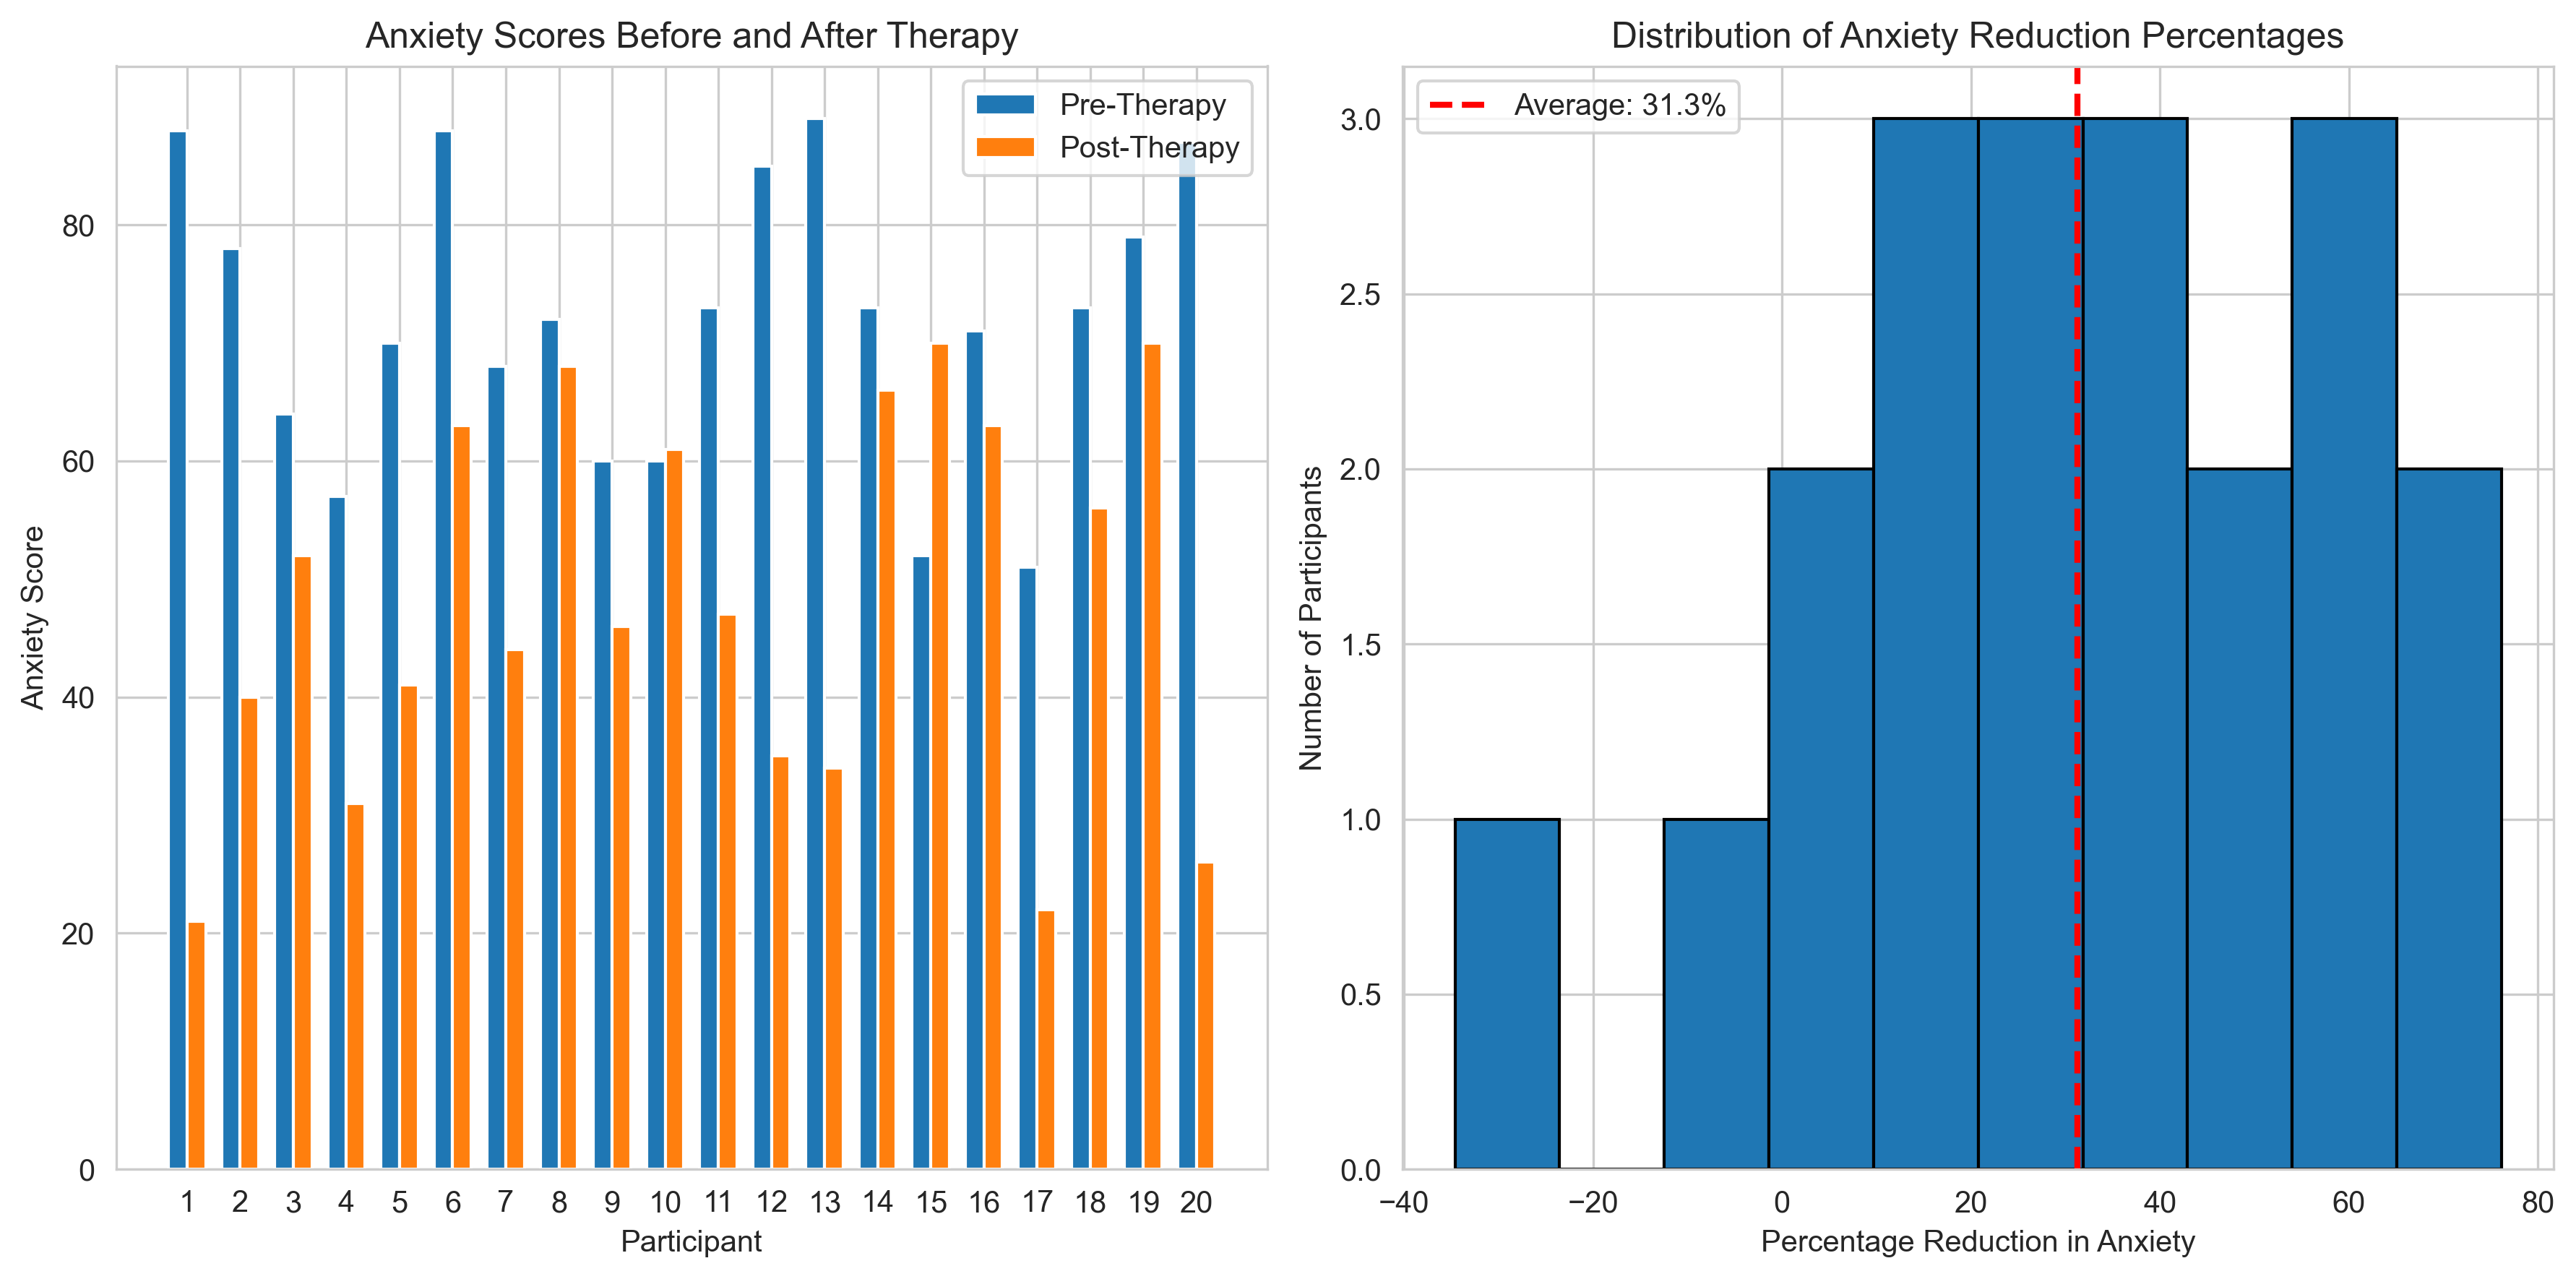

Average anxiety reduction: 31.3%
Number of participants with >30% reduction: 10
Percentage of participants with >30% reduction: 50.0%


In [5]:
# Calculate average percentage reduction
avg_percent_reduction = np.mean(percent_reduction)

# Plot the results
plt.figure(figsize=(12, 6))

# Bar chart showing pre and post therapy scores
plt.subplot(1, 2, 1)
x = np.arange(len(pre_therapy))
width = 0.35
plt.bar(x - width/2, pre_therapy, width, label='Pre-Therapy')
plt.bar(x + width/2, post_therapy, width, label='Post-Therapy')
plt.xlabel('Participant')
plt.ylabel('Anxiety Score')
plt.title('Anxiety Scores Before and After Therapy')
plt.xticks(x, [str(i+1) for i in range(len(pre_therapy))])
plt.legend()

# Histogram of percentage reductions
plt.subplot(1, 2, 2)
plt.hist(percent_reduction, bins=10, edgecolor='black')
plt.axvline(avg_percent_reduction, color='red', linestyle='dashed', linewidth=2, 
            label=f'Average: {avg_percent_reduction:.1f}%')
plt.xlabel('Percentage Reduction in Anxiety')
plt.ylabel('Number of Participants')
plt.title('Distribution of Anxiety Reduction Percentages')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Average anxiety reduction: {avg_percent_reduction:.1f}%")
print(f"Number of participants with >30% reduction: {sum(p > 30 for p in percent_reduction)}")
print(f"Percentage of participants with >30% reduction: {sum(p > 30 for p in percent_reduction)/len(percent_reduction)*100:.1f}%")

In this example, we calculated the percentage reduction in anxiety for each participant and analyzed the results. This is a common approach in clinical psychology research to evaluate treatment effectiveness.

The code above:
1. Simulates pre- and post-therapy anxiety scores for 20 participants
2. Calculates the percentage reduction for each participant using the formula: $\frac{pre - post}{pre} \times 100$
3. Creates visualizations to help understand the data
4. Calculates summary statistics like the average percentage reduction

This demonstrates how percentages can help us understand and communicate the effectiveness of an intervention.

## Calculating Percentages

There are three main types of percentage calculations:

1. **Finding the percentage of a number**: What is X% of Y?
2. **Finding what percentage one number is of another**: X is what percentage of Y?
3. **Finding the original number when a percentage is known**: X is Y% of what number?

Let's explore each of these with psychological examples.

### 1. Finding the percentage of a number

To find X% of Y, we multiply: $Y \times \frac{X}{100}$

**Example**: In a memory study, participants correctly recalled 75% of a list of 40 words. How many words did they recall?

Solution: $40 \times \frac{75}{100} = 40 \times 0.75 = 30$ words

In [6]:
def find_percentage_of_number(percentage, number):
    """Calculate X% of Y"""
    return (percentage / 100) * number

# Example: 75% of 40 words
total_words = 40
recall_percentage = 75
recalled_words = find_percentage_of_number(recall_percentage, total_words)

print(f"{recall_percentage}% of {total_words} words = {recalled_words} words")

75% of 40 words = 30.0 words


### 2. Finding what percentage one number is of another

To find what percentage X is of Y, we calculate: $\frac{X}{Y} \times 100$

**Example**: In a study on attention, participants correctly identified 18 out of 30 targets. What percentage of targets did they correctly identify?

Solution: $\frac{18}{30} \times 100 = 0.6 \times 100 = 60\%$

In [7]:
def find_percentage(part, whole):
    """Calculate what percentage X is of Y"""
    return (part / whole) * 100

# Example: 18 out of 30 targets
correct_identifications = 18
total_targets = 30
percentage_correct = find_percentage(correct_identifications, total_targets)

print(f"{correct_identifications} out of {total_targets} targets = {percentage_correct}%")

18 out of 30 targets = 60.0%


### 3. Finding the original number when a percentage is known

To find the original number when we know that X is Y% of it, we calculate: $\frac{X}{Y} \times 100$

**Example**: In a clinical trial, 45 participants showed improvement, which was 60% of the total sample. How many participants were in the total sample?

Solution: $\frac{45}{60} \times 100 = 0.75 \times 100 = 75$ participants

In [8]:
def find_original_number(part, percentage):
    """Calculate the original number when we know X is Y% of it"""
    return (part / percentage) * 100

# Example: 45 participants is 60% of the total
improved_participants = 45
improvement_percentage = 60
total_participants = find_original_number(improved_participants, improvement_percentage)

print(f"If {improved_participants} participants is {improvement_percentage}% of the total,")
print(f"then the total number of participants was {total_participants}")

If 45 participants is 60% of the total,
then the total number of participants was 75.0


## Percentage Change

Percentage change is a way to describe how much a value has increased or decreased relative to its original value. It's calculated as:

$$\text{Percentage Change} = \frac{\text{New Value} - \text{Original Value}}{\text{Original Value}} \times 100$$

- If the result is positive, it's a percentage increase
- If the result is negative, it's a percentage decrease

This is particularly useful in psychology for measuring changes in behavior, performance, or symptoms over time or after an intervention.

In [9]:
def calculate_percentage_change(original_value, new_value):
    """Calculate the percentage change from original to new value"""
    return ((new_value - original_value) / original_value) * 100

# Example: Depression scores before and after treatment
before_treatment = 28  # Depression score before treatment
after_treatment = 16   # Depression score after treatment

percentage_change = calculate_percentage_change(before_treatment, after_treatment)

print(f"Depression score before treatment: {before_treatment}")
print(f"Depression score after treatment: {after_treatment}")
print(f"Percentage change: {percentage_change:.1f}%")

if percentage_change < 0:
    print(f"This represents a {abs(percentage_change):.1f}% decrease in depression symptoms.")
else:
    print(f"This represents a {percentage_change:.1f}% increase in depression symptoms.")

Depression score before treatment: 28
Depression score after treatment: 16
Percentage change: -42.9%
This represents a 42.9% decrease in depression symptoms.


## Proportions

A proportion is a part compared to the whole, expressed as a fraction or decimal between 0 and 1. Proportions are closely related to percentages - a percentage is simply a proportion multiplied by 100.

In psychology, proportions are often used in:

1. **Probability calculations**: e.g., the proportion of participants who respond to a treatment
2. **Statistical analyses**: e.g., proportion tests, binomial distributions
3. **Sampling**: e.g., ensuring proportional representation of different demographics

Let's look at an example of how proportions are used in psychological research.

Group A response proportion: 0.525 (52.5%)
Group B response proportion: 0.644 (64.4%)


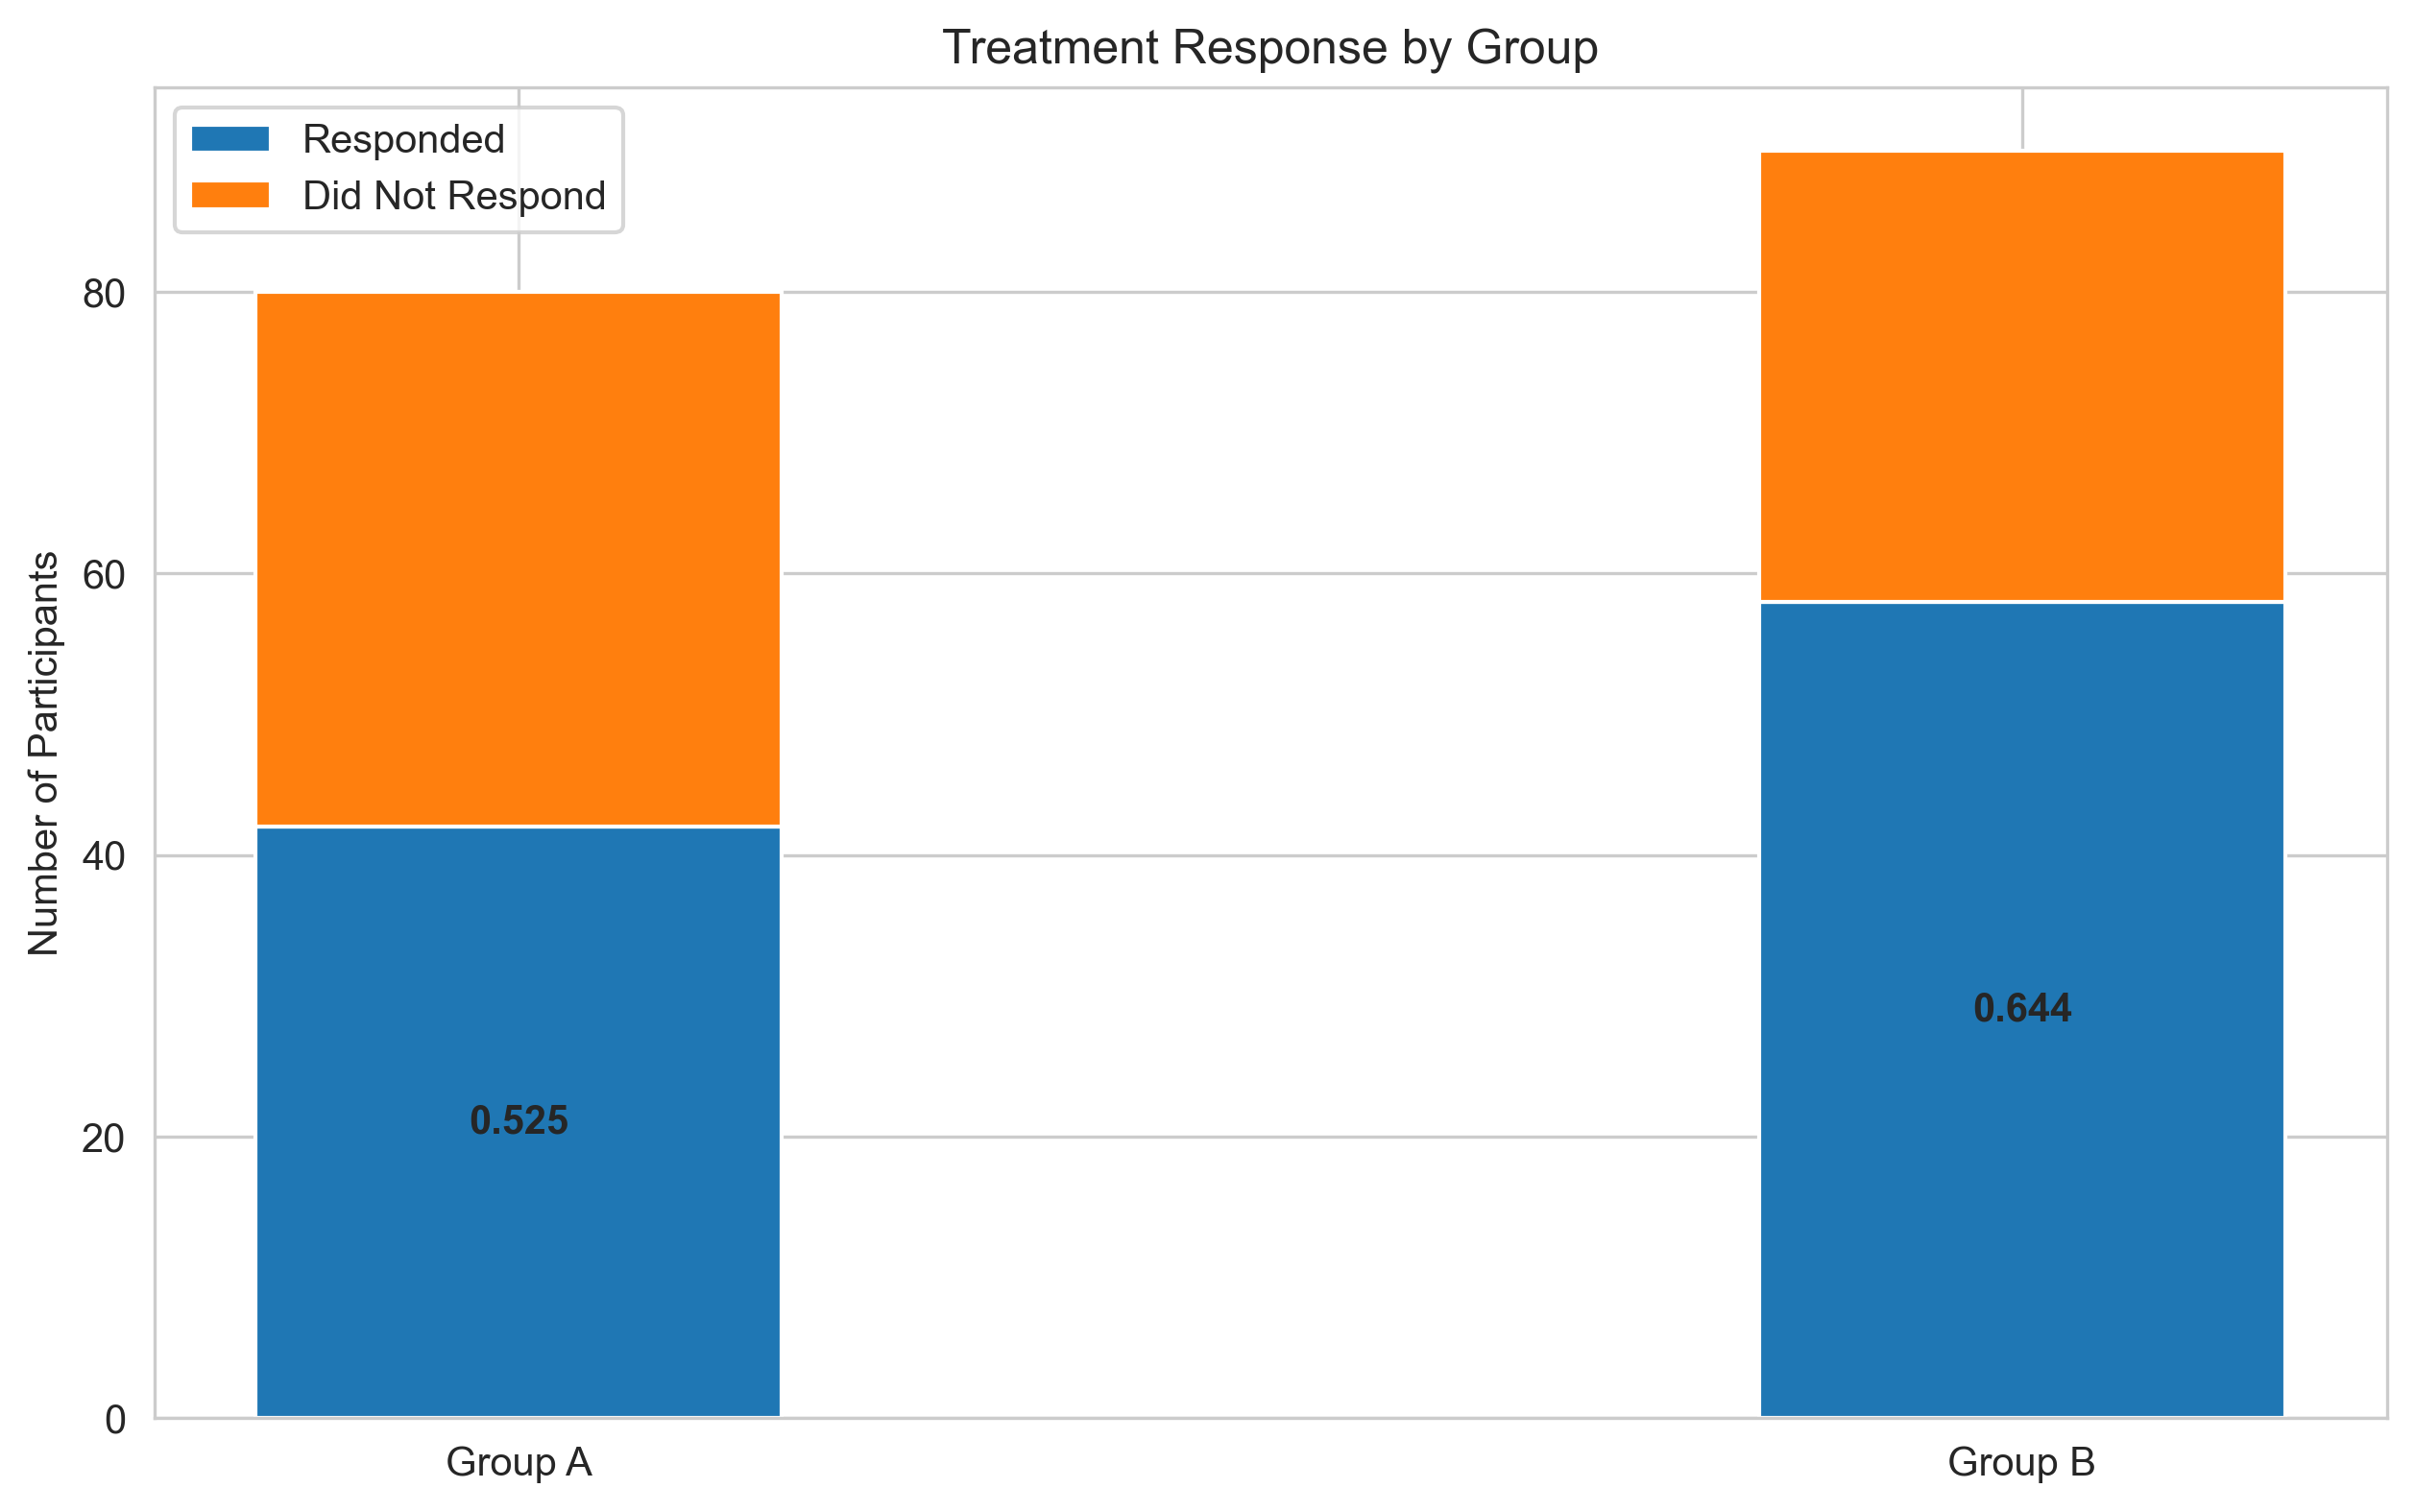

In [10]:
# Example: Comparing response proportions between two groups
# Group A: 42 out of 80 participants responded to treatment
# Group B: 58 out of 90 participants responded to treatment

group_a_responses = 42
group_a_total = 80
group_a_proportion = group_a_responses / group_a_total

group_b_responses = 58
group_b_total = 90
group_b_proportion = group_b_responses / group_b_total

print(f"Group A response proportion: {group_a_proportion:.3f} ({group_a_proportion*100:.1f}%)")
print(f"Group B response proportion: {group_b_proportion:.3f} ({group_b_proportion*100:.1f}%)")

# Visualize the proportions
labels = ['Group A', 'Group B']
responded = [group_a_responses, group_b_responses]
not_responded = [group_a_total - group_a_responses, group_b_total - group_b_responses]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
ax.bar(labels, responded, width, label='Responded')
ax.bar(labels, not_responded, width, bottom=responded, label='Did Not Respond')

# Add proportion labels
for i, label in enumerate(labels):
    if i == 0:
        proportion = group_a_proportion
    else:
        proportion = group_b_proportion
    ax.text(i, responded[i]/2, f"{proportion:.3f}", ha='center', va='center', fontweight='bold')

ax.set_ylabel('Number of Participants')
ax.set_title('Treatment Response by Group')
ax.legend()

plt.show()

### Statistical Significance of Proportions

In psychological research, we often want to know if the difference between two proportions is statistically significant. For example, is the difference in treatment response between Group A and Group B meaningful, or could it have occurred by chance?

We can use a **proportion test** (also called a z-test for proportions) to answer this question. Let's implement this test:

In [11]:
from scipy import stats
import numpy as np
# Continuing with our example
# Group A: 42 out of 80 participants responded to treatment
# Group B: 58 out of 90 participants responded to treatment

# Define the values
group_a_responses = 42
group_a_total = 80
group_b_responses = 58
group_b_total = 90

# Calculate proportions
p1 = group_a_responses / group_a_total
p2 = group_b_responses / group_b_total
n1 = group_a_total
n2 = group_b_total

# Calculate pooled proportion
p_pooled = (group_a_responses + group_b_responses) / (group_a_total + group_b_total)

# Calculate standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))

# Calculate z-statistic
stat = (p1 - p2) / se

# Calculate two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(stat)))

print(f"Z-statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in proportions is statistically significant.")
    print("We can conclude that the response rates differ between the two groups.")
else:
    print("The difference in proportions is not statistically significant.")
    print("We cannot conclude that the response rates differ between the two groups.")

Z-statistic: -1.579
P-value: 0.114
The difference in proportions is not statistically significant.
We cannot conclude that the response rates differ between the two groups.


## Odds and Odds Ratios

Related to proportions are **odds**, which are used extensively in psychological research, especially in logistic regression and risk analysis.

The odds of an event are defined as the ratio of the probability of the event occurring to the probability of it not occurring:

$$\text{Odds} = \frac{p}{1-p}$$

where $p$ is the probability (or proportion) of the event.

An **odds ratio** compares the odds of an event in two different groups:

$$\text{Odds Ratio} = \frac{\text{Odds for Group 1}}{\text{Odds for Group 2}}$$

Let's calculate the odds and odds ratio for our treatment response example:

In [12]:
def calculate_odds(proportion):
    """Calculate odds from a proportion"""
    return proportion / (1 - proportion)

def calculate_odds_ratio(odds1, odds2):
    """Calculate odds ratio from two odds"""
    return odds1 / odds2

# Calculate odds for each group
odds_a = calculate_odds(group_a_proportion)
odds_b = calculate_odds(group_b_proportion)

# Calculate odds ratio
odds_ratio = calculate_odds_ratio(odds_b, odds_a)  # B compared to A

print(f"Group A odds: {odds_a:.3f}")
print(f"Group B odds: {odds_b:.3f}")
print(f"Odds ratio (B to A): {odds_ratio:.3f}")

# Interpret the odds ratio
if odds_ratio > 1:
    print(f"The odds of responding to treatment are {odds_ratio:.3f} times higher in Group B than in Group A.")
else:
    print(f"The odds of responding to treatment are {1/odds_ratio:.3f} times higher in Group A than in Group B.")

Group A odds: 1.105
Group B odds: 1.813
Odds ratio (B to A): 1.640
The odds of responding to treatment are 1.640 times higher in Group B than in Group A.


## Practical Applications in Psychology

Let's explore a more complex example that demonstrates how percentages and proportions are used in psychological research. We'll simulate a study examining the relationship between study time and exam performance.

In [13]:
# Simulate data for 100 students
np.random.seed(123)
study_hours = np.random.normal(15, 5, 100)  # Mean of 15 hours, SD of 5
study_hours = np.clip(study_hours, 0, 30)   # Ensure hours are between 0 and 30

# Calculate exam scores based on study time (with some random variation)
# Formula: score = 50 + 2*hours + random noise
noise = np.random.normal(0, 10, 100)  # Random noise with SD of 10
exam_scores = 50 + 2 * study_hours + noise
exam_scores = np.clip(exam_scores, 0, 100)  # Ensure scores are between 0 and 100

# Create a DataFrame
student_data = pd.DataFrame({
    'Student ID': range(1, 101),
    'Study Hours': study_hours.round(1),
    'Exam Score': exam_scores.round(1)
})

# Display the first few rows
student_data.head()

Student ID  Study Hours  Exam Score
0           1          9.6        75.6
1           2         20.0        70.2
2           3         16.4        90.0
3           4          7.5        90.9
4           5         12.1        74.0

In [14]:
# Calculate some statistics
passing_score = 70
student_data['Passed'] = student_data['Exam Score'] >= passing_score

# Group students by study time
student_data['Study Group'] = pd.cut(student_data['Study Hours'], 
                                    bins=[0, 10, 20, 30], 
                                    labels=['Low (0-10 hrs)', 'Medium (10-20 hrs)', 'High (20-30 hrs)'])

# Calculate pass rates by study group
pass_rates = student_data.groupby('Study Group')['Passed'].agg(['count', 'sum'])
pass_rates['Pass Rate'] = (pass_rates['sum'] / pass_rates['count'] * 100).round(1)
pass_rates['Odds'] = (pass_rates['sum'] / (pass_rates['count'] - pass_rates['sum'])).round(2)
pass_rates.columns = ['Total Students', 'Passed', 'Pass Rate (%)', 'Odds']

# Display the results
pass_rates

Total Students  Passed  Pass Rate (%)   Odds
Study Group                                                     
Low (0-10 hrs)                  20       6           30.0   0.43
Medium (10-20 hrs)              57      46           80.7   4.18
High (20-30 hrs)                23      22           95.7  22.00

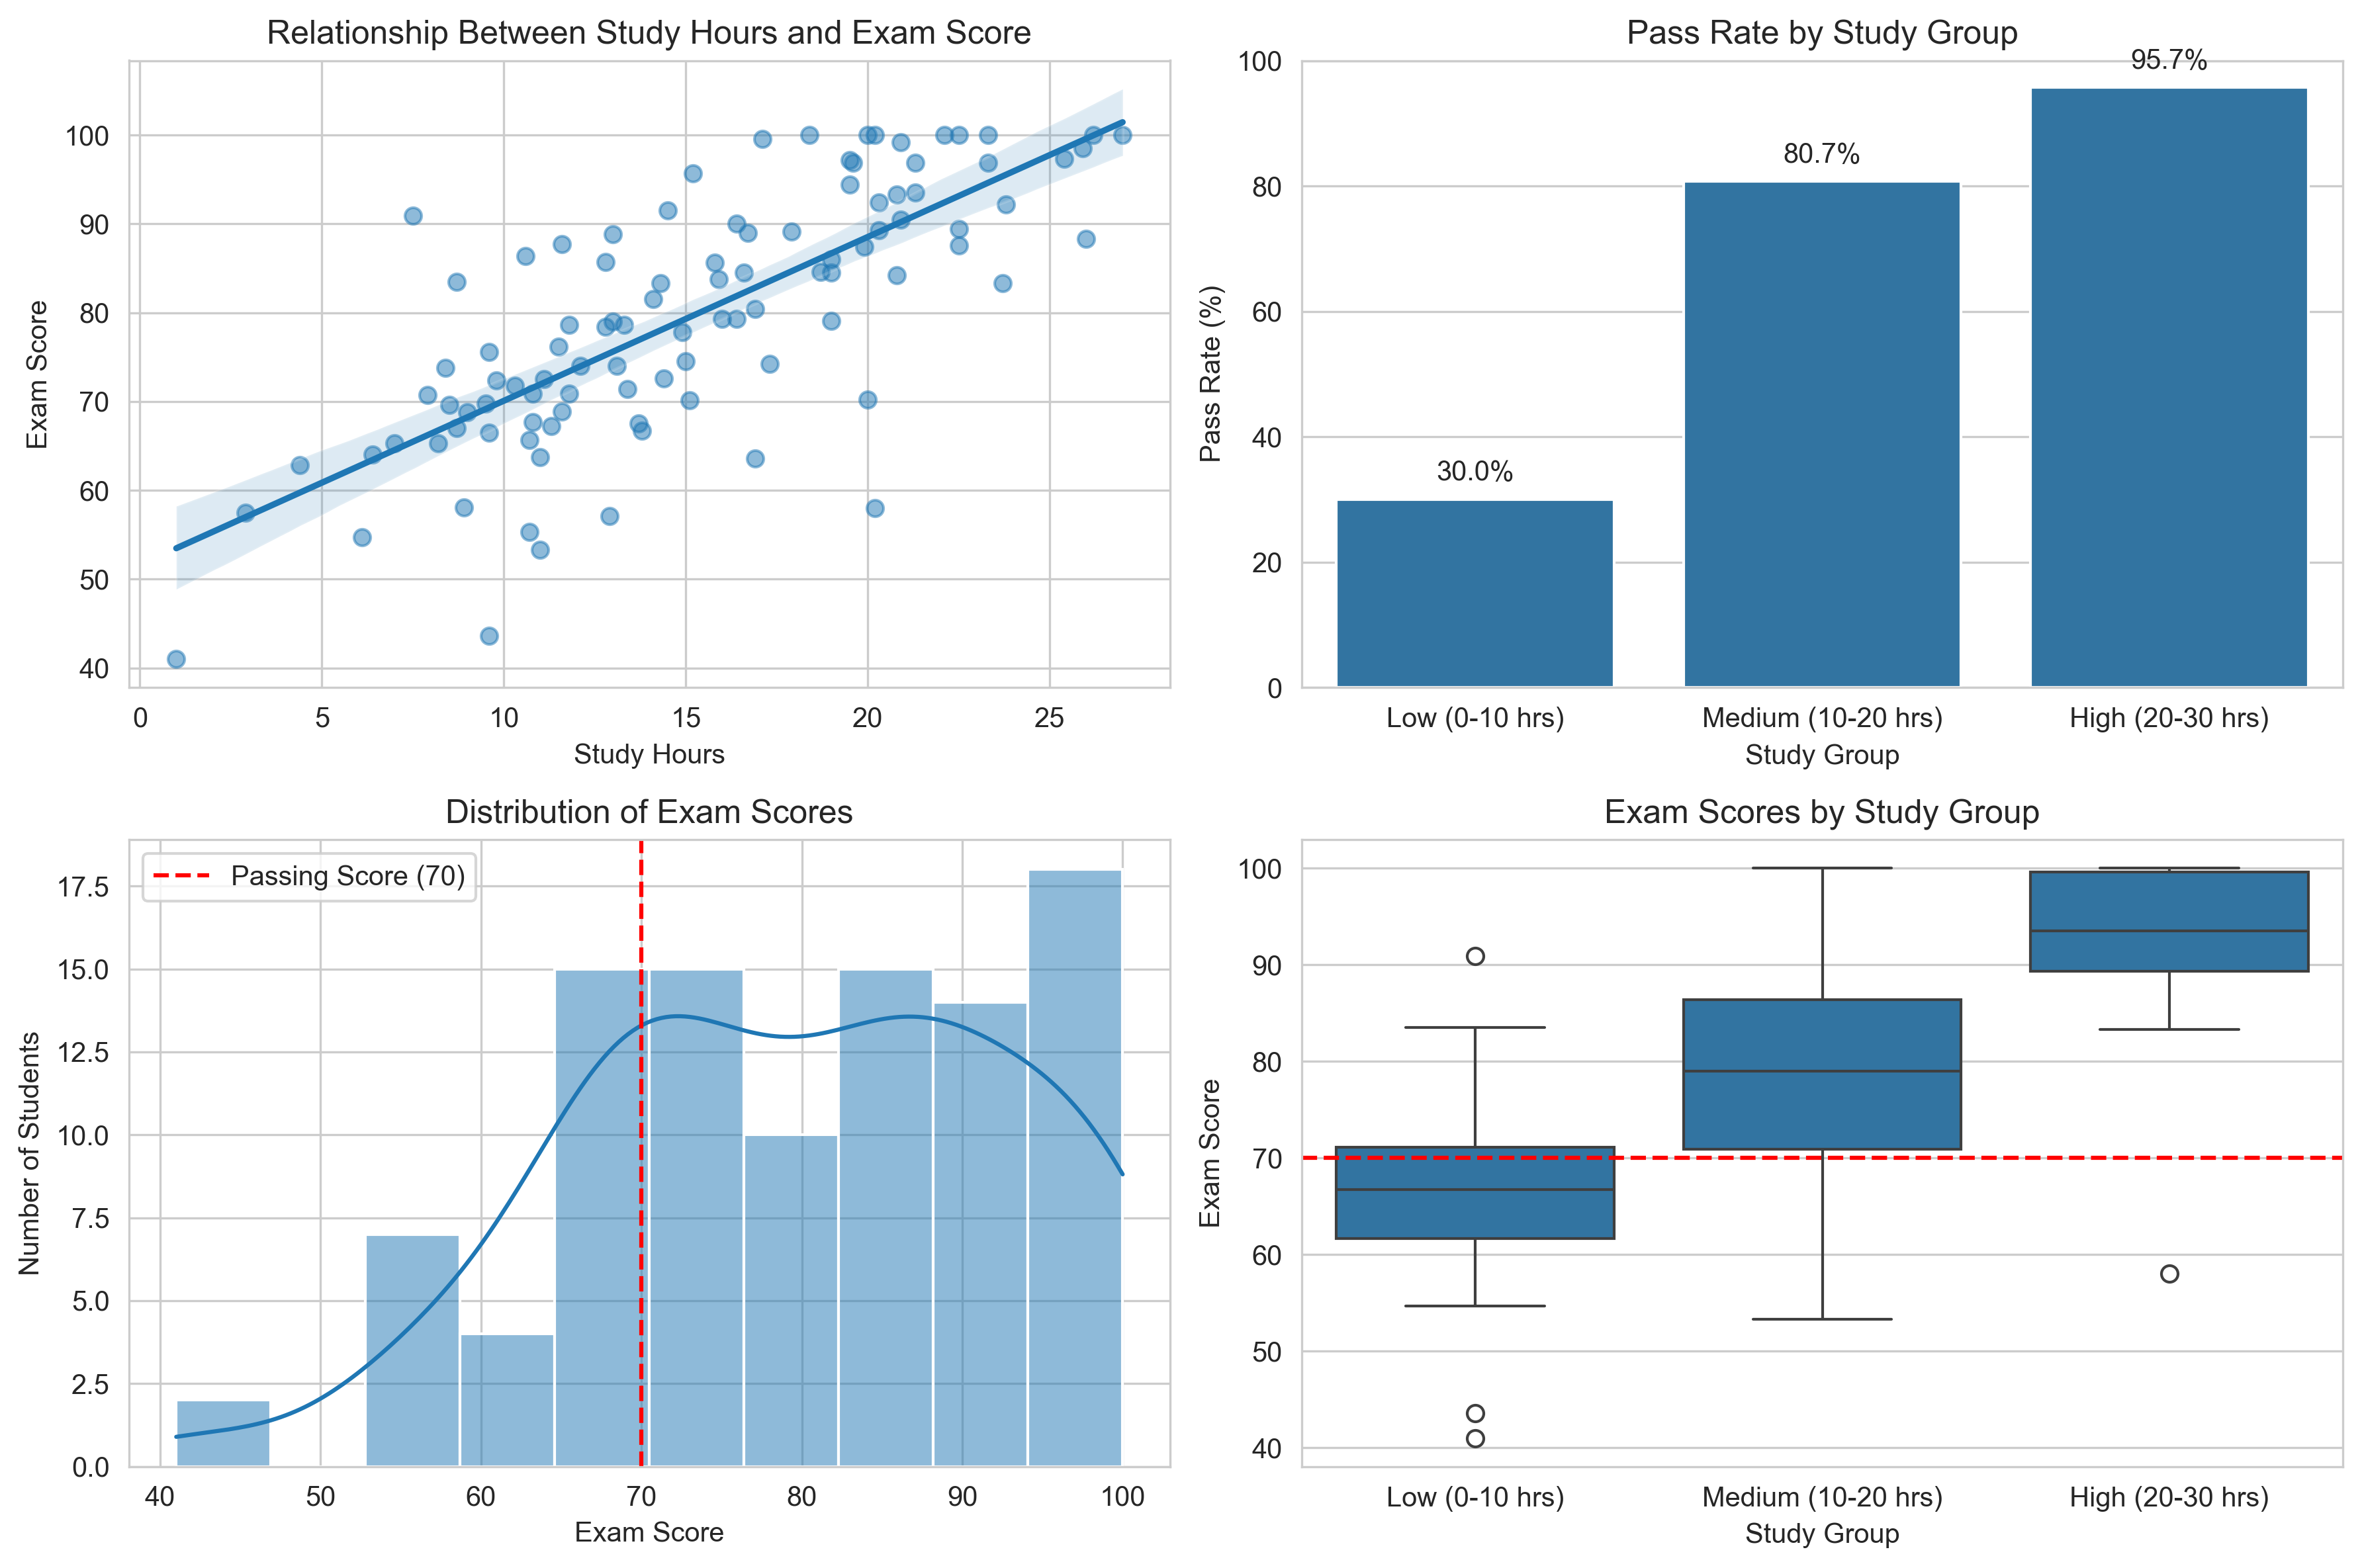

In [15]:
# Visualize the relationship between study time and exam performance
plt.figure(figsize=(12, 8))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
sns.regplot(x='Study Hours', y='Exam Score', data=student_data, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Study Hours and Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

# Bar chart of pass rates by study group
plt.subplot(2, 2, 2)
sns.barplot(x=pass_rates.index, y='Pass Rate (%)', data=pass_rates)
plt.title('Pass Rate by Study Group')
plt.xlabel('Study Group')
plt.ylabel('Pass Rate (%)')
plt.ylim(0, 100)
for i, rate in enumerate(pass_rates['Pass Rate (%)']):
    plt.text(i, rate + 3, f"{rate}%", ha='center')

# Distribution of exam scores
plt.subplot(2, 2, 3)
sns.histplot(student_data['Exam Score'], bins=10, kde=True)
plt.axvline(passing_score, color='red', linestyle='--', label=f'Passing Score ({passing_score})')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.legend()

# Box plot of scores by study group
plt.subplot(2, 2, 4)
sns.boxplot(x='Study Group', y='Exam Score', data=student_data)
plt.axhline(passing_score, color='red', linestyle='--', label=f'Passing Score ({passing_score})')
plt.title('Exam Scores by Study Group')
plt.xlabel('Study Group')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

Let's calculate the odds ratios to compare the different study groups:

In [16]:
# Calculate odds ratios
odds_low = pass_rates.loc['Low (0-10 hrs)', 'Odds']
odds_medium = pass_rates.loc['Medium (10-20 hrs)', 'Odds']
odds_high = pass_rates.loc['High (20-30 hrs)', 'Odds']

# Medium vs Low
odds_ratio_med_low = odds_medium / odds_low
# High vs Low
odds_ratio_high_low = odds_high / odds_low
# High vs Medium
odds_ratio_high_med = odds_high / odds_medium

print(f"Odds ratio (Medium vs Low): {odds_ratio_med_low:.2f}")
print(f"Odds ratio (High vs Low): {odds_ratio_high_low:.2f}")
print(f"Odds ratio (High vs Medium): {odds_ratio_high_med:.2f}")

print("\nInterpretation:")
print(f"- Students in the Medium study group are {odds_ratio_med_low:.2f} times more likely to pass than those in the Low group")
print(f"- Students in the High study group are {odds_ratio_high_low:.2f} times more likely to pass than those in the Low group")
print(f"- Students in the High study group are {odds_ratio_high_med:.2f} times more likely to pass than those in the Medium group")

Odds ratio (Medium vs Low): 9.72
Odds ratio (High vs Low): 51.16
Odds ratio (High vs Medium): 5.26

Interpretation:
- Students in the Medium study group are 9.72 times more likely to pass than those in the Low group
- Students in the High study group are 51.16 times more likely to pass than those in the Low group
- Students in the High study group are 5.26 times more likely to pass than those in the Medium group


## Percentage Points vs. Percentages

It's important to distinguish between **percentage points** and **percentages** when describing changes:

- A **percentage point** (pp) is the arithmetic difference between two percentages
- A **percentage change** is the relative change between the original and new percentages

For example, if a pass rate increases from 40% to 60%:
- The increase is 20 percentage points (60% - 40%)
- The percentage increase is 50% ((60% - 40%) / 40% × 100%)

Let's calculate both for our study groups:

In [17]:
# Extract pass rates
pass_rate_low = pass_rates.loc['Low (0-10 hrs)', 'Pass Rate (%)']
pass_rate_medium = pass_rates.loc['Medium (10-20 hrs)', 'Pass Rate (%)']
pass_rate_high = pass_rates.loc['High (20-30 hrs)', 'Pass Rate (%)']

# Calculate percentage point differences
pp_diff_med_low = pass_rate_medium - pass_rate_low
pp_diff_high_low = pass_rate_high - pass_rate_low
pp_diff_high_med = pass_rate_high - pass_rate_medium

# Calculate percentage changes
pct_change_med_low = (pass_rate_medium - pass_rate_low) / pass_rate_low * 100
pct_change_high_low = (pass_rate_high - pass_rate_low) / pass_rate_low * 100
pct_change_high_med = (pass_rate_high - pass_rate_medium) / pass_rate_medium * 100

print("Percentage Point Differences:")
print(f"Medium vs Low: {pp_diff_med_low:.1f} percentage points")
print(f"High vs Low: {pp_diff_high_low:.1f} percentage points")
print(f"High vs Medium: {pp_diff_high_med:.1f} percentage points")

print("\nPercentage Changes:")
print(f"Medium vs Low: {pct_change_med_low:.1f}% increase")
print(f"High vs Low: {pct_change_high_low:.1f}% increase")
print(f"High vs Medium: {pct_change_high_med:.1f}% increase")

Percentage Point Differences:
Medium vs Low: 50.7 percentage points
High vs Low: 65.7 percentage points
High vs Medium: 15.0 percentage points

Percentage Changes:
Medium vs Low: 169.0% increase
High vs Low: 219.0% increase
High vs Medium: 18.6% increase


## Summary

In this chapter, we've explored percentages and proportions, which are essential mathematical concepts in psychological research. We've learned:

1. **Percentages** are a way of expressing numbers as fractions of 100, making them easier to compare and understand
2. **Converting** between fractions, decimals, and percentages
3. **Calculating percentages** in different scenarios (finding X% of Y, finding what percentage X is of Y, etc.)
4. **Percentage change** for measuring increases or decreases relative to an original value
5. **Proportions** as parts of a whole, expressed as decimals between 0 and 1
6. **Odds and odds ratios** for comparing the likelihood of events between different groups
7. The distinction between **percentage points** and **percentage changes**

These concepts are fundamental in psychology for:
- Describing samples and populations
- Analyzing experimental results
- Reporting treatment effects
- Communicating research findings
- Making statistical inferences

Understanding percentages and proportions allows psychologists to make meaningful comparisons, identify patterns, and draw conclusions from their data.

## Practice Problems

1. In a study on memory, participants correctly recalled 35 out of 50 words. What percentage of words did they recall?

2. A cognitive therapy reduced anxiety scores by 30%. If the average score after therapy was 28, what was the average score before therapy?

3. In a survey, 65% of respondents reported experiencing stress in the past month. If 195 people reported experiencing stress, how many people were surveyed in total?

4. In a clinical trial, the success rate of a new treatment was 75%, while the success rate of the standard treatment was 60%. Calculate:
   a) The percentage point difference between the treatments
   b) The percentage increase in success rate for the new treatment compared to the standard treatment
   c) The odds ratio comparing the new treatment to the standard treatment

5. A researcher found that the proportion of participants who completed a challenging task increased from 0.4 to 0.6 after receiving encouragement. Calculate the percentage increase in the completion rate.

## Solutions to Practice Problems

1. Percentage recalled = (35 ÷ 50) × 100 = 70%

2. If the score after therapy (28) represents 70% of the original score, then:
   Original score = 28 ÷ 0.7 = 40
   
3. If 195 people represent 65% of the total, then:
   Total number surveyed = 195 ÷ 0.65 = 300
   
4. a) Percentage point difference = 75% - 60% = 15 percentage points
   b) Percentage increase = ((75% - 60%) ÷ 60%) × 100 = 25%
   c) Odds for new treatment = 0.75 ÷ 0.25 = 3
      Odds for standard treatment = 0.6 ÷ 0.4 = 1.5
      Odds ratio = 3 ÷ 1.5 = 2
      The odds of success are 2 times higher with the new treatment.
   
5. Percentage increase = ((0.6 - 0.4) ÷ 0.4) × 100 = 50%